![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Classification of Dogs and Cats

Based on

* [CNN Model With PyTorch For Image Classification](https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48)

* [Pytorch CNN tutorial with cats and dogs](https://www.kaggle.com/code/reukki/pytorch-cnn-tutorial-with-cats-and-dogs/notebook)

IMPORTANT:

For a fast training with an accuracy of about 70% choose 'Reduced Dataset' * For a slow training with an accuracy of about 85% choose 'Full Dataset'.

* For a slow training with an accuracy of about 85% choose 'Full Dataset'.

In [ ]:
# Reduced dataset
!wget https://www.dropbox.com/s/fg3kzwskuzdkj0c/catdog_reduced.zip
!unzip -qq catdog_reduced.zip

--2023-07-19 13:28:08--  https://www.dropbox.com/s/fg3kzwskuzdkj0c/catdog_reduced.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/fg3kzwskuzdkj0c/catdog_reduced.zip [following]
--2023-07-19 13:28:08--  https://www.dropbox.com/s/raw/fg3kzwskuzdkj0c/catdog_reduced.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce9a28043ba02b17cfe76e707ca.dl.dropboxusercontent.com/cd/0/inline/CALQqxgy7-_sJ6DuFRyd8x3HgOCyFf5y4T_12wrE8J4_W50GXlb1O-9oDeaxEwFLbwxBEd7I-oU-yZuqmhx4QskE9vHNH0kVynbMRgMcC7Teu-gdf9AjzcDb8QXxHe2OXdADGIDQtydT1ZpOig631J7yVRrJDxuDhcrjWGu5ce4P0Q/file# [following]
--2023-07-19 13:28:09--  https://uce9a28043ba02b17cfe76e707ca.dl.dropboxusercontent.com/cd/0/inline/CALQqxgy7-_sJ6DuFRyd8x3HgOCyFf5y4T_12wrE8J4_W50GXlb1O-9oDea

In [ ]:
# Full dataset
!wget https://www.dropbox.com/s/co88j47ju3kzigf/test_set.zip
!wget https://www.dropbox.com/s/qsydgoqz5givt4s/training_set.zip

!unzip -qq test_set.zip
!unzip -qq training_set.zip

--2023-07-19 13:28:25--  https://www.dropbox.com/s/co88j47ju3kzigf/test_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/co88j47ju3kzigf/test_set.zip [following]
--2023-07-19 13:28:25--  https://www.dropbox.com/s/raw/co88j47ju3kzigf/test_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfc51ea54bda3d1700ef6afe0c2.dl.dropboxusercontent.com/cd/0/inline/CALGC1zzFgueRkTsZL7pc2mQRsP6pqROUZa662xJs8qnh6MxYtjL13MMC0zPUn4bt4lntFcsGc8Dl_wLdRF80oxV9fEHkwqsLjUU59WdG5jzKI6yQWMzOkyJX29nmu4inlbnKtDRmRw7KkJV4cTidvYJ0AkuN5LLt8Bx7pb_zC1mUg/file# [following]
--2023-07-19 13:28:25--  https://ucfc51ea54bda3d1700ef6afe0c2.dl.dropboxusercontent.com/cd/0/inline/CALGC1zzFgueRkTsZL7pc2mQRsP6pqROUZa662xJs8qnh6MxYtjL13MMC0zPUn4bt4lntFcsGc8Dl

In [ ]:
import torch
import torchvision
from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score

#train and test data directory > select FULL or REDUCED

#FULL DATASET
#train_dir = "training_set/"
#test_dir  = "test_set/"

#REDUCED DATASET
train_dir = "catdog/train/"
test_dir  = "catdog/test/"

#load the train and test data
train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),transforms.RandomHorizontalFlip(),transforms.ToTensor()]))

test_set = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((64,64)),transforms.ToTensor()]))

img,_ = train_set[0]
print('Size image: '+ str(img.shape))
print('   Classes: ',train_set.classes)

Size image: torch.Size([3, 64, 64])
   Classes:  ['cats', 'dogs']


In [ ]:
!wget https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
from cnn_utils import *
print('cnn_utils module has been loaded')

--2023-07-19 13:29:24--  https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2q224dslxdiag7i/cnn_utils.py [following]
--2023-07-19 13:29:25--  https://www.dropbox.com/s/raw/2q224dslxdiag7i/cnn_utils.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc59b137b6f8fb94a2bebd6e8df7.dl.dropboxusercontent.com/cd/0/inline/CAIfjJ3gjOWHmObk5cZtH3KZjMzja27i4AfgZTx2HcANEQC2k2iBoMmtKexNGgI_9HRFKhQ4d4fq0VBFqHRPTzui1RiB09R4u0Lx-lFyMm58NQ4SJ1DpzAqWU39i_UAwofn6aJWxyIMyXv8cDzgDrSRdiIzKlyyYgjIhHP3QTNFq8A/file# [following]
--2023-07-19 13:29:26--  https://uc59b137b6f8fb94a2bebd6e8df7.dl.dropboxusercontent.com/cd/0/inline/CAIfjJ3gjOWHmObk5cZtH3KZjMzja27i4AfgZTx2HcANEQC2k2iBoMmtKexNGgI_9HRFKhQ4d4fq0

Image: 5, Label : cats


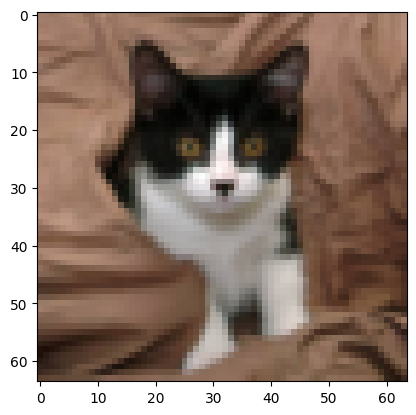

In [ ]:
#display an image in the training dataset
display_img(train_set,5)

In [ ]:
#load the train and validation into batches.

batch_size = 100
val_size   = 800
train_size = len(train_set) - val_size

train_data,val_data = random_split(train_set,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl = DataLoader(val_data, batch_size, num_workers = 4, pin_memory = True)


Length of Train Data : 3200
Length of Validation Data : 800


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


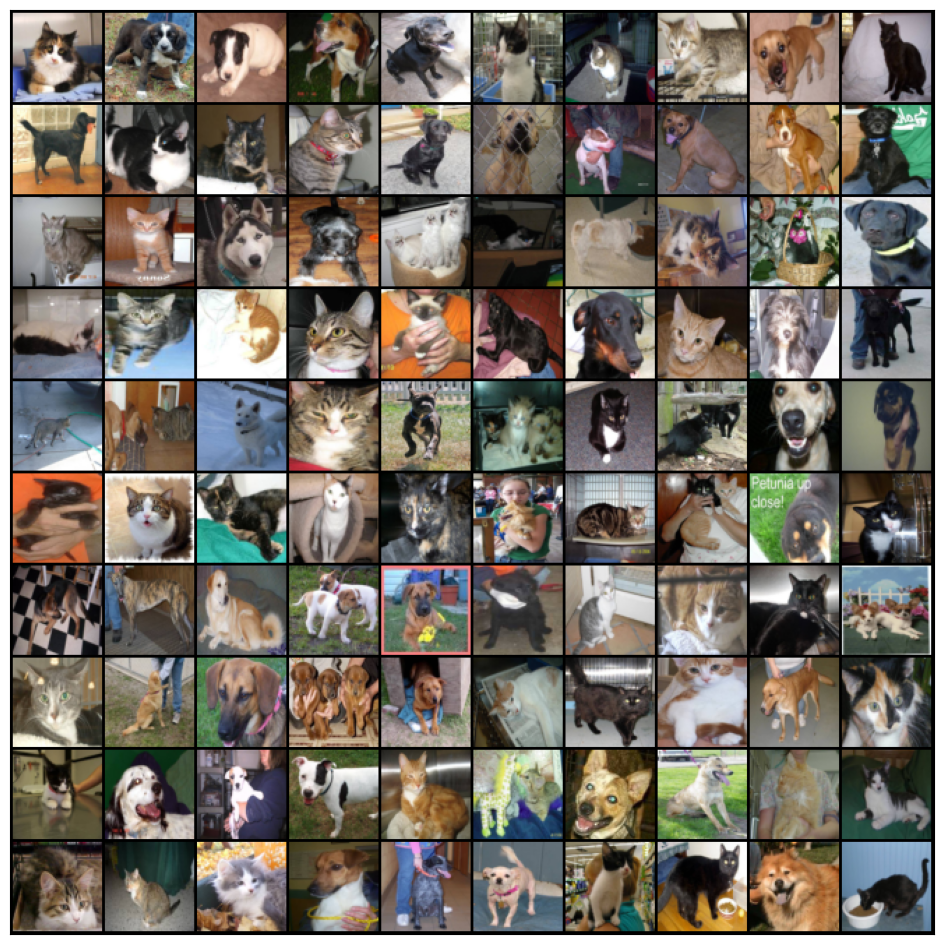

In [ ]:
show_batch(train_dl,nrow=10)

In [ ]:
# for reduced dataset
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 4, kernel_size = 5, stride = 1, padding = 0),
            nn.ReLU(),
            nn.Conv2d(4,8, kernel_size = 5, stride = 4, padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(392,32),
            nn.Linear(32,2)
        )

    def forward(self, xb):
        return self.network(xb)


In [ ]:
# for full dataset
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 8, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(8,16, kernel_size = 3, stride = 2, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(16, 32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(2048,1024),
            nn.Linear(1024,128),
            nn.Linear(128,2),
            nn.Dropout(0.25)
        )

    def forward(self, xb):
        return self.network(xb)


In [ ]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(4, 8, kernel_size=(5, 5), stride=(4, 4))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=392, out_features=32, bias=True)
    (7): Linear(in_features=32, out_features=2, bias=True)
  )
)


In [ ]:
#fitting the model on training data and record the result after each epoch
num_epochs = 50
opt_func   = torch.optim.Adam
lr         = 0.0005
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------
    0      0.6969      0.6936      0.5012    ***      14.2 
    1      0.6911      0.6918      0.5188    ***      13.3 
    2      0.6886      0.6879      0.5462    ***      13.5 
    3      0.6826      0.6821      0.5725    ***      13.4 
    4      0.6716      0.6818      0.5750    ***      13.4 
    5      0.6591      0.6610      0.5987    ***      13.4 
    6      0.6399      0.6312      0.6800    ***      13.6 
    7      0.6281      0.6288      0.6562             13.7 
    8      0.6139      0.6062      0.6988    ***      14.1 
    9      0.6069      0.5983      0.7100    ***      13.8 
   10      0.6150      0.5995      0.6988             13.8 
   11      0.5969      0.5806      0.7100             13.5 
   12      0.5862      0.5988      0.6975             13.5 
   13      0.5965      0.5854      0.7125    ***      13.7 
   14      0.5811      0.6064 

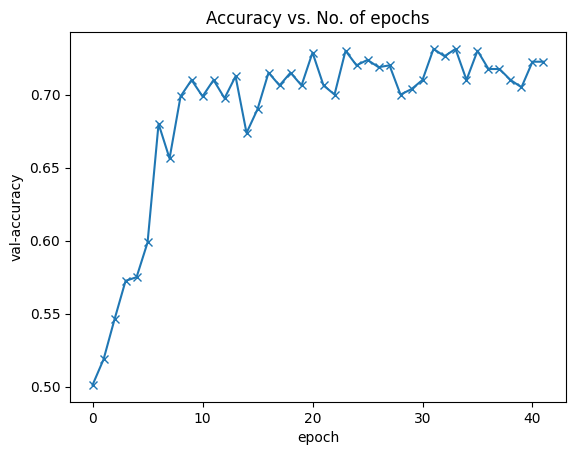

In [ ]:
plot_accuracies(history)

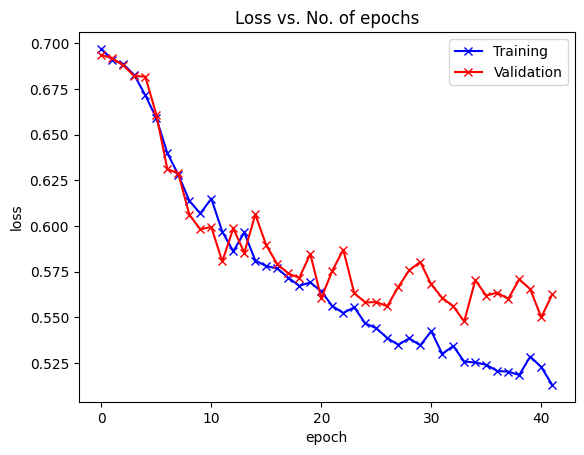

In [ ]:
plot_losses(history)

In [ ]:
model = load_model(CNN_Classification,'best_model.pt')

best_model.pt loaded.


In [ ]:
ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred)
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.7062937062937062
 
Confusion Matrix = 
[[352 149]
 [145 355]]


In [ ]:
C1,acc1 = performance(model,train_data,'Training')
C2,acc2 = performance(model,val_data,'Validation')
C3,acc3 = performance(model,test_set,'Testing')

Training Confusion Matrix = 
[[1179  422]
 [ 400 1199]]
 
Training Accuracy = 0.7431
 
Validation Confusion Matrix = 
[[289 110]
 [112 289]]
 
Validation Accuracy = 0.7225
 
Testing Confusion Matrix = 
[[352 149]
 [145 355]]
 
Testing Accuracy = 0.7063
 
